Description: SEM images of the metal-nitrides thin films, depending on the metals concentrations and processing conditions

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Read the images

In [ ]:
from skimage import color
from skimage import io

In [3]:
import matplotlib.image as mpimg

Read the JPG files

In [29]:
img1=mpimg.imread('class1.jpg')
img2=mpimg.imread('class2.jpg')
img3=mpimg.imread('class3.jpg')

and show it

In [32]:
img1

array([[[122, 122, 122],
        [121, 121, 121],
        [119, 119, 119],
        ...,
        [176, 176, 176],
        [170, 170, 170],
        [166, 166, 166]],

       [[125, 125, 125],
        [124, 124, 124],
        [121, 121, 121],
        ...,
        [181, 181, 181],
        [179, 179, 179],
        [178, 178, 178]],

       [[120, 120, 120],
        [120, 120, 120],
        [120, 120, 120],
        ...,
        [153, 153, 153],
        [152, 152, 152],
        [151, 151, 151]],

       ...,

       [[135, 135, 135],
        [132, 132, 132],
        [121, 121, 121],
        ...,
        [169, 169, 169],
        [159, 159, 159],
        [143, 143, 143]],

       [[146, 146, 146],
        [141, 141, 141],
        [124, 124, 124],
        ...,
        [156, 156, 156],
        [144, 144, 144],
        [127, 127, 127]],

       [[155, 155, 155],
        [148, 148, 148],
        [129, 129, 129],
        ...,
        [149, 149, 149],
        [138, 138, 138],
        [122, 122, 122]]

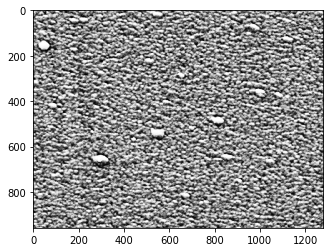

In [31]:
plt.imshow(img1)

Text(0.5, 1.0, 'Class 3')

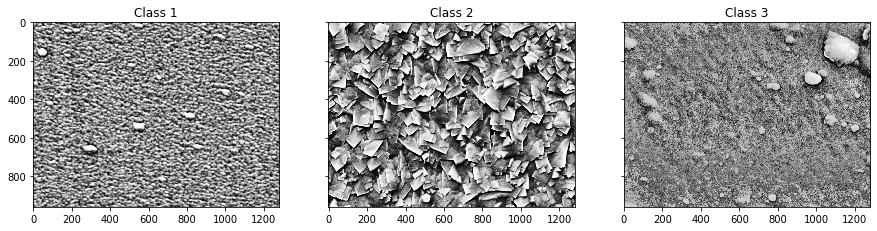

In [5]:
fig, axs = plt.subplots(1,3, figsize=(15,5), sharex=True, sharey=True)

axs[0].imshow(img1)
axs[0].grid(False)
axs[0].set_title("Class 1")

axs[1].imshow(img2)
axs[1].grid(False)
axs[1].set_title("Class 2")


axs[2].imshow(img3)
axs[2].grid(False)
axs[2].set_title("Class 3")

In [6]:
class_names=["Class 1","Class 2","Class 3"]

Check the shape of the data

In [7]:
img1.shape

(959, 1280, 3)

In [8]:
img2.shape

(959, 1280, 3)

In [9]:
img3.shape

(959, 1280, 3)

We have 1280 x 959 px images.
Last dimension with 3 numbers corresponds to RGB channels. Let us convert the images to gray scale, i.e. with a single grey channel only

In [33]:
img1_gr=color.rgb2gray(img1)
img2_gr=color.rgb2gray(img2)
img3_gr=color.rgb2gray(img3)

In [34]:
img1_gr.shape

(959, 1280)

In [35]:
img1_gr

array([[0.47843137, 0.4745098 , 0.46666667, ..., 0.69019608, 0.66666667,
        0.65098039],
       [0.49019608, 0.48627451, 0.4745098 , ..., 0.70980392, 0.70196078,
        0.69803922],
       [0.47058824, 0.47058824, 0.47058824, ..., 0.6       , 0.59607843,
        0.59215686],
       ...,
       [0.52941176, 0.51764706, 0.4745098 , ..., 0.6627451 , 0.62352941,
        0.56078431],
       [0.57254902, 0.55294118, 0.48627451, ..., 0.61176471, 0.56470588,
        0.49803922],
       [0.60784314, 0.58039216, 0.50588235, ..., 0.58431373, 0.54117647,
        0.47843137]])

Now the shape is correct, as only one element per each pixel

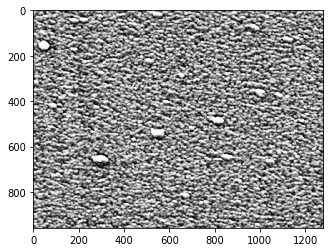

In [12]:
plt.imshow(img1_gr, cmap="gray")
plt.grid(False)

Just for your information:

if you compute the histogram of the grey color intensity, it has a name "Intensity Histogram"

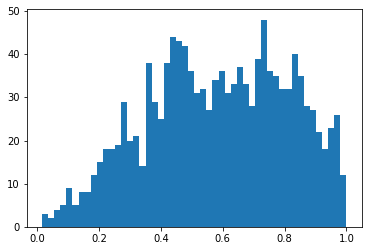

In [13]:
plt.hist(img1_gr[0], bins=50);

We will crop the images onto 28\*28 pixel squares
**!!! remember this place, you will return back here later !!!**

In [36]:
sx=28
sy=28

In [15]:
MAX_X = img1_gr.shape[0]
MAX_Y = img1_gr.shape[1]

In [38]:
MAX_Y

1280

In [39]:
class1_data=[]
class2_data=[]
class3_data=[]

for x_coord in np.arange(0,MAX_X-sx,sx):
    for y_coord in np.arange(0,MAX_Y-sy,sy):
        class1_data.append(img1_gr[x_coord:x_coord+sx, y_coord:y_coord+sy])
        class2_data.append(img2_gr[x_coord:x_coord+sx, y_coord:y_coord+sy])
        class3_data.append(img3_gr[x_coord:x_coord+sx, y_coord:y_coord+sy])

In [40]:
len(class1_data)

1530

In [41]:
len(class2_data)

1530

In [42]:
len(class3_data)

1530

In [43]:
class1_data[0].shape

(28, 28)

Class 1


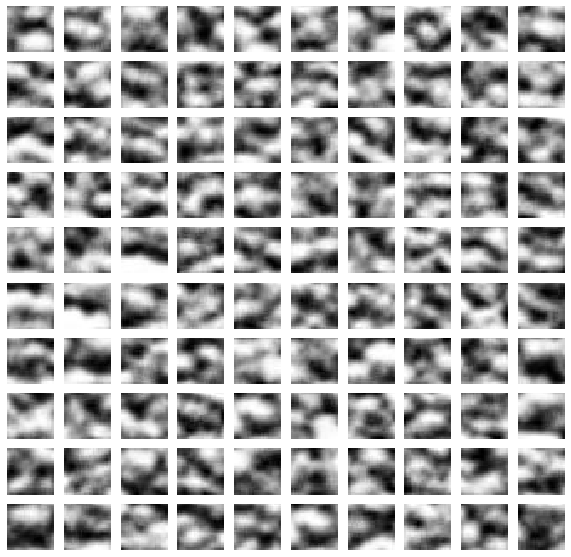

In [47]:
print("Class 1")
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(class1_data[np.random.randint(0,len(class1_data))], cmap="gray")
    plt.axis('off')
    plt.grid(False)
plt.show()

Class 2


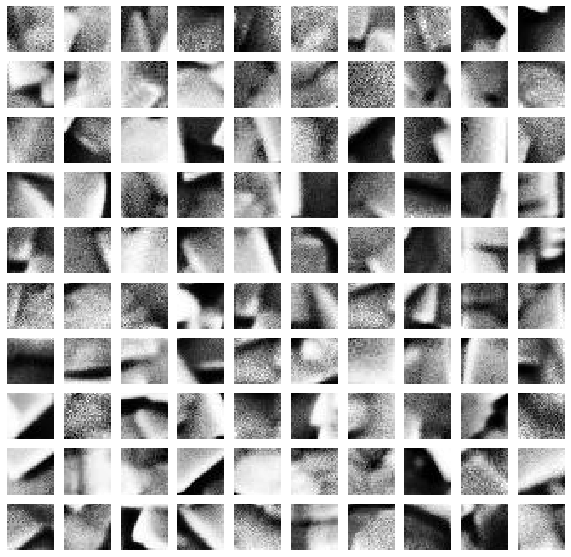

In [48]:
print("Class 2")
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(class2_data[np.random.randint(0,len(class1_data))], cmap="gray")
    plt.axis('off')
    plt.grid(False)
plt.show()

Class 3


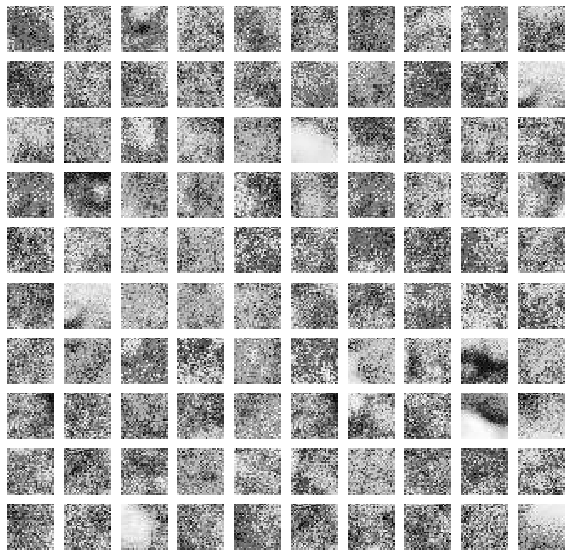

In [49]:
print("Class 3")
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.imshow(class3_data[np.random.randint(0,len(class1_data))], cmap="gray")
    plt.axis('off')
    plt.grid(False)
plt.show()

In [50]:
X = np.vstack([class1_data, class2_data, class3_data])

In [51]:
X.shape

(4590, 28, 28)

Create a corresponding labels and

In [54]:
len([1]*len(class1_data))

1530

In [55]:
labels = np.array([0]*len(class1_data) + [1]*len(class2_data) + [2]*len(class3_data))

In [56]:
color_dict={0:"red",1:"lightgreen",2:"blue"}

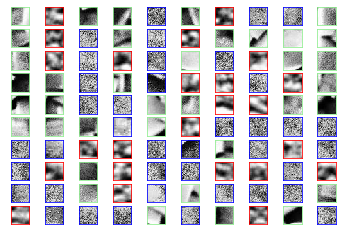

In [57]:
for i in range(100):
    plt.subplot(10,10,i+1)
    ind=np.random.randint(0,len(X))
    plt.imshow(X[ind], cmap="gray")
    ax = plt.gca()
    c=color_dict[labels[ind]]
    plt.setp(ax.spines.values(), color=c)
    #plt.axis('off')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.grid(False)
plt.show()

perform a one-hot encoding

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
y = OneHotEncoder().fit_transform(labels.reshape(-1,1))

C:\Users\Navyanth\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Finally, our data

In [71]:
y.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [72]:
X.shape

(4590, 28, 28)

In [73]:
y.shape

(4590, 3)

# Routines for model validation

**!!! Read more here on the confusion matrix, precision, recall and F1 score:**

https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from keras import backend as K

Using TensorFlow backend.


In [77]:
def prob_to_class(y):
     return np.argmax(y,axis=1).reshape(-1,1)

In [78]:
def probabilities_to_class_converter(func):
    def f(y_true,y_pred,*args,**kwargs):
        return func(prob_to_class(y_true), prob_to_class(y_pred),*args,**kwargs)
    return f

In [79]:
def max_probability_confusion_matrix(y_true, y_pred):
    return confusion_matrix(
        prob_to_class(y_true),
        prob_to_class(y_pred)
    )

In [81]:
accuracy_score=probabilities_to_class_converter(accuracy_score)
precision_score=probabilities_to_class_converter(precision_score)
recall_score=probabilities_to_class_converter(recall_score)
f1_score = probabilities_to_class_converter(f1_score)

In [82]:
def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall
def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2*((p*r)/(p+r+K.epsilon()))

In [83]:
def plot_confusion_matrix(conf_matrix,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = conf_matrix
    # Only use the labels that appear in the data
    classes = class_names
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.grid(False)
    return ax

In [84]:
def plot_train_history(history):
    metrics=["acc","precision","recall","f1"]

    plt.figure(figsize=(7,7))

    for i,metric in enumerate(metrics):
        plt.subplot(2,2,i+1)
        plt.plot(history.history[metric], label="Train")
        plt.plot(history.history['val_'+metric], label="Test")
        plt.xlabel("Epoch")
        plt.ylabel(metric)
        plt.legend()
    plt.tight_layout()

In [86]:
def model_predict(model):
    return model.predict(X_test_ch)

In [87]:
def model_test_summary(model):
    y_pred = model_predict(model)
    cm=max_probability_confusion_matrix(y_test,y_pred)
    cm_df=pd.DataFrame(cm, columns=class_names, index=class_names)
    plot_confusion_matrix(cm,normalize=True)
    print("Precision: {}\nAccuracy: {}\nRecall: {}\nF1-score: {}".format(
        precision_score(y_test, y_pred, average="macro"),
        accuracy_score(y_test, y_pred),
        recall_score(y_test, y_pred, average="macro"),
        f1_score(y_test, y_pred, average="macro")
    ))

In [88]:
def model_wrong_predictions(model):
    y_pred = model_predict(model)
    
    y_pred_class=prob_to_class(y_pred)    
    y_t=np.array(y_test_class.reshape(-1))[0]
    y_p=np.array(y_pred_class.reshape(-1))

    pred_df=pd.DataFrame({"True":y_t, "Pred":y_p})

    pred_df["Error"]=pred_df["True"]!=pred_df["Pred"]

    err_df=pred_df[pred_df["Error"]]

    for cl in range(3):
        print("True class: ",cl+1)
        subdf=err_df[err_df["True"]==cl]


        other_cl=list(range(3))
        other_cl.remove(cl)

        for pred_cl in other_cl:
            wrong_pred=subdf[subdf["Pred"]==pred_cl].index
            if len(wrong_pred)>0:
                wrong_predicted_indices=np.random.choice(subdf[subdf["Pred"]==pred_cl].index,size=4)

                print("Wrongly predicted as Class "+str(pred_cl+1))
                for ax_i,ind in enumerate(wrong_predicted_indices):
                    plt.subplot(2,2,ax_i+1)
                    plt.imshow(X_test[ind],cmap="gray")
                    plt.axis("off")
                    plt.grid(False)
                plt.show()

# Model validation strategy

train/test split

In [89]:
X.shape

(4590, 28, 28)

In [90]:
y.shape

(4590, 3)

In [91]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15, random_state=42, shuffle=True)

In [92]:
y_test_class=prob_to_class(y_test)

In [97]:
y_test.toarray()

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [95]:
y_test.shape

(689, 3)

In [99]:
X_train.shape

(3901, 28, 28)

In [100]:
X_test.shape

(689, 28, 28)

change the shape of the input images, to add one gray chanel

In [101]:
X_train_ch=X_train.reshape(-1,sx,sy,1)
X_test_ch=X_test.reshape(-1,sx,sy,1)

In [105]:
X_train_ch.shape

(3901, 28, 28, 1)

In [106]:
input_shape = (sx,sy,1)

In [107]:
input_shape

(28, 28, 1)

# Task:  create a neural network classifier to identify the class of the images

https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

In [110]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer,Flatten

## Baseline model

In [112]:
model=Sequential()

model.add(InputLayer(input_shape=input_shape))
model.add(Flatten())
model.add(Dense(10,input_shape=input_shape, activation="relu"))
model.add(Dense(3,activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', precision,recall,f1])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 33        
Total params: 7,883
Trainable params: 7,883
Non-trainable params: 0
_________________________________________________________________


Train the model

In [113]:
X_train_ch.shape

(3901, 28, 28, 1)

In [114]:
history=model.fit(X_train_ch,y_train, validation_data=(X_test_ch,y_test), batch_size=1024, epochs=50)

W0810 17:12:12.494479 12224 deprecation.py:323] From C:\Users\Navyanth\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0810 17:12:12.562420 12224 deprecation_wrapper.py:119] From C:\Users\Navyanth\AppData\Roaming\Python\Python37\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 3901 samples, validate on 689 samples
Epoch 1/50
3901/3901 [==============================] - 0s 95us/step - loss: 1.1399 - acc: 0.3963 - precision: 0.4320 - recall: 0.0843 - f1: 0.1331 - val_loss: 1.1067 - val_acc: 0.3962 - val_precision: 0.5769 - val_recall: 0.0653 - val_f1: 0.1173
Epoch 2/50
3901/3901 [==============================] - 0s 19us/step - loss: 1.1024 - acc: 0.3958 - precision: 0.5673 - recall: 0.0564 - f1: 0.1024 - val_loss: 1.1030 - val_acc: 0.3266 - val_precision: 0.4590 - val_recall: 0.0406 - val_f1: 0.0747
Epoch 3/50
3901/3901 [==============================] - 0s 18us/step - loss: 1.0836 - acc: 0.3594 - precision: 0.5996 - recall: 0.0367 - f1: 0.0686 - val_loss: 1.0664 - val_acc: 0.3672 - val_precision: 0.7407 - val_recall: 0.0290 - val_f1: 0.0559
Epoch 4/50
3901/3901 [==============================] - 0s 15us/step - loss: 1.0654 - acc: 0.3725 - precision: 0.7558 - recall: 0.0249 - f1: 0.0481 - val_loss: 1.0564 - val_acc: 0.4514 - val_precision: 0.9333 - v

Epoch 34/50
3901/3901 [==============================] - 0s 18us/step - loss: 0.8802 - acc: 0.6588 - precision: 0.7761 - recall: 0.2843 - f1: 0.4160 - val_loss: 0.8901 - val_acc: 0.6401 - val_precision: 0.7812 - val_recall: 0.2903 - val_f1: 0.4233
Epoch 35/50
3901/3901 [==============================] - 0s 14us/step - loss: 0.8757 - acc: 0.6701 - precision: 0.7875 - recall: 0.2879 - f1: 0.4215 - val_loss: 0.8867 - val_acc: 0.6415 - val_precision: 0.7717 - val_recall: 0.2845 - val_f1: 0.4157
Epoch 36/50
3901/3901 [==============================] - 0s 16us/step - loss: 0.8701 - acc: 0.6721 - precision: 0.7825 - recall: 0.2915 - f1: 0.4244 - val_loss: 0.8822 - val_acc: 0.6313 - val_precision: 0.7701 - val_recall: 0.3062 - val_f1: 0.4382
Epoch 37/50
3901/3901 [==============================] - 0s 14us/step - loss: 0.8651 - acc: 0.6683 - precision: 0.7730 - recall: 0.3079 - f1: 0.4403 - val_loss: 0.8790 - val_acc: 0.6401 - val_precision: 0.7536 - val_recall: 0.3019 - val_f1: 0.4311
Epoch 38

Plot it training history

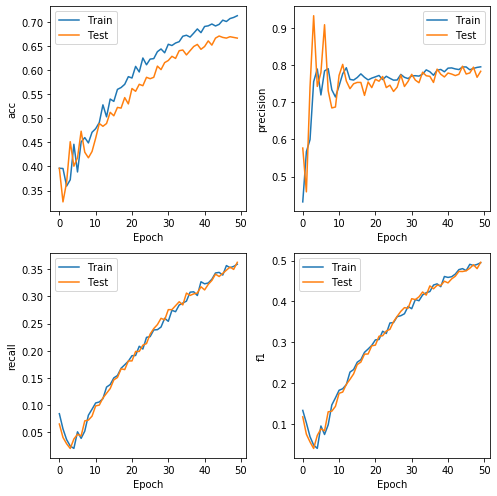

In [115]:
plot_train_history(history)

Show the summary of the model performance and confusion matrix

Normalized confusion matrix
Precision: 1.0
Accuracy: 1.0
Recall: 1.0
F1-score: 1.0


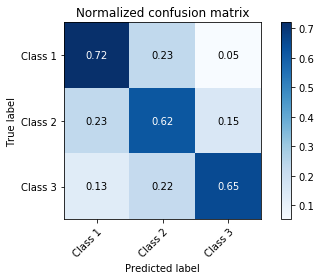

In [116]:
model_test_summary(model)

Illustrate the wrong predictions

True class:  1
Wrongly predicted as Class 2


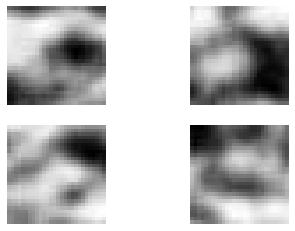

Wrongly predicted as Class 3


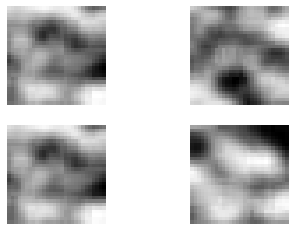

True class:  2
Wrongly predicted as Class 1


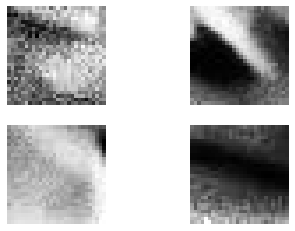

Wrongly predicted as Class 3


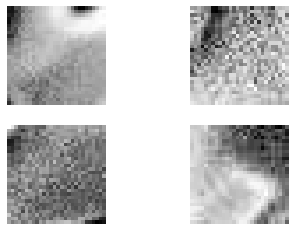

True class:  3
Wrongly predicted as Class 1


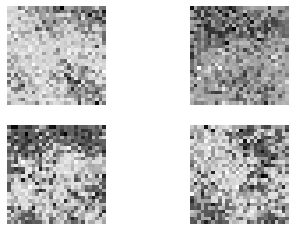

Wrongly predicted as Class 2


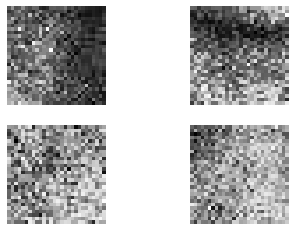

In [117]:
model_wrong_predictions(model)

## Your model(s) here

In [108]:
from keras.layers import Convolution2D, Conv2D, Dropout, BatchNormalization, MaxPooling2D

In [ ]:
model2=Sequential()

model2.add(InputLayer(input_shape=input_shape))

#add your layers here

model2.add(Flatten())
model2.add(Dense(3,activation="softmax"))

#try another optimizer
optimizer="adam"
model2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', precision,recall,f1])
model2.summary()

Train the model

In [ ]:
history2=model2.fit(X_train_ch,y_train, validation_data=(X_test_ch,y_test),epochs=50)

Plot it training history

In [ ]:
plot_train_history(history2)

Show the summary of the model performance and confusion matrix

In [ ]:
model_test_summary(model2)

Illustrate the wrong predictions

In [ ]:
model_wrong_predictions(model2)

# Tasks

1. Build and train the model with the **minimum number** of parameters and performance F1 > 0.985
 - consider convolution layers, max pooling layers, dense layers after flattening, batch normalization layers
 - consider different activation functions (linear, sigmoid, tanh, relu)
 - consider different optimizers (adam, rmsprop, sgd, adadelta, ...) 
2. Change the input image size, consider 8x8, 12x12, 16x16, 28x28, 32x32. How performances of your best model from p.1 changes as a function of image size?